In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings(action = "ignore") 
#this is simply to turn off warning messages in jupyter because its a distraction

plt.style.use('fivethirtyeight')
#replicate styles of 538, a matter of preference on the article's writer
import pandas as pd
import statsmodels.api as sm
#package for exploring data, estimating stat models and perform stat tests; many types available

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
#more customizations that don't really matter to me and are a matter of preference from the writer

In [2]:
#get the desired file
df = pd.read_excel("\\Users\monae\OneDrive\Documents\Sample - Superstore.xls")

In [3]:
#glance over to make sure I know what's actually in the dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
#select rows in which the column of 'Category' is 'Furniture'
furniture = df.loc[df['Category'] == 'Furniture']

In [5]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [6]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [7]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
#put all of the columns that we don't want to make it easier to drop
furniture.drop(cols, axis=1, inplace=True)
#drop those columns by the columns (axis), and no need to produce a copy

In [8]:
furniture = furniture.sort_values('Order Date')
#sort by the order date

In [9]:
furniture.isnull().sum()
#return the number of missing values in the set for each column

Order Date    0
Sales         0
dtype: int64

In [10]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [11]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [12]:
furniture = furniture.set_index('Order Date')
furniture.index
#modifications made above to avoid errors here

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [13]:
y = furniture['Sales'].resample('MS').mean()
#y is furniture sales based on month but start (default is end), find the mean

In [14]:
y['2017':]
#look it over and make sure it's right, slice what y provides starting at 2017
#it is correct

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

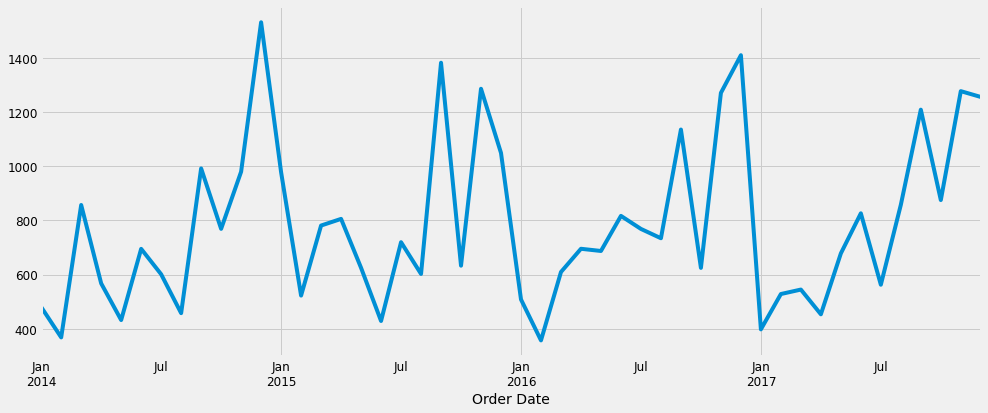

In [15]:
y.plot(figsize=(15,6))
plt.show()
#default is width of 6.4 and height of 4.8 
#but not always the best option, this is that author's preference
#personally, I have no care for this at the moment

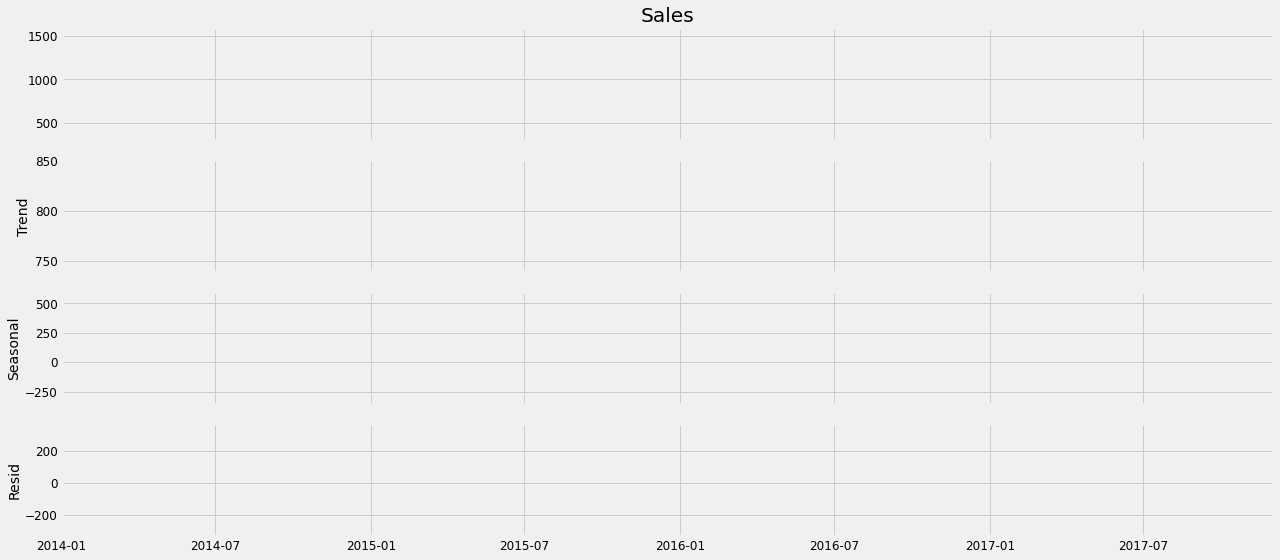

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8 
#change the size without using the figure  environment, set as tuple

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
#monthly averages of furniture sales, using the additive model (because the seasonal variation is relatively constant)
#if not then multiplicative for when the seasonal variation increases over time

fig = decomposition.plot()
#written to return the figure (according to documentation)

plt.show()
#Issue: shows nothing
#Notes:
# nothing wrong with import of rcParams line
# even if, rcParams, that's just a matter of the graph's overall size so nbd if it doesn't work
# going to start with the decomposition plot line

<AxesSubplot:xlabel='Order Date'>

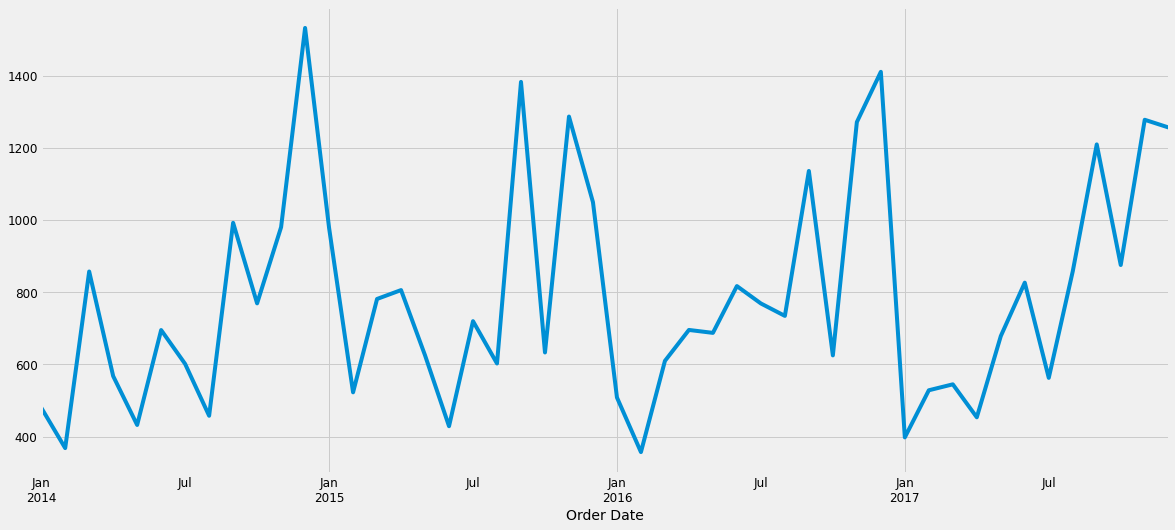

In [17]:
#looks above board, since it's specifically about the fact that it's not showing properly
#try if plotting a specific element of the decomposition works
decomposition.observed.plot()

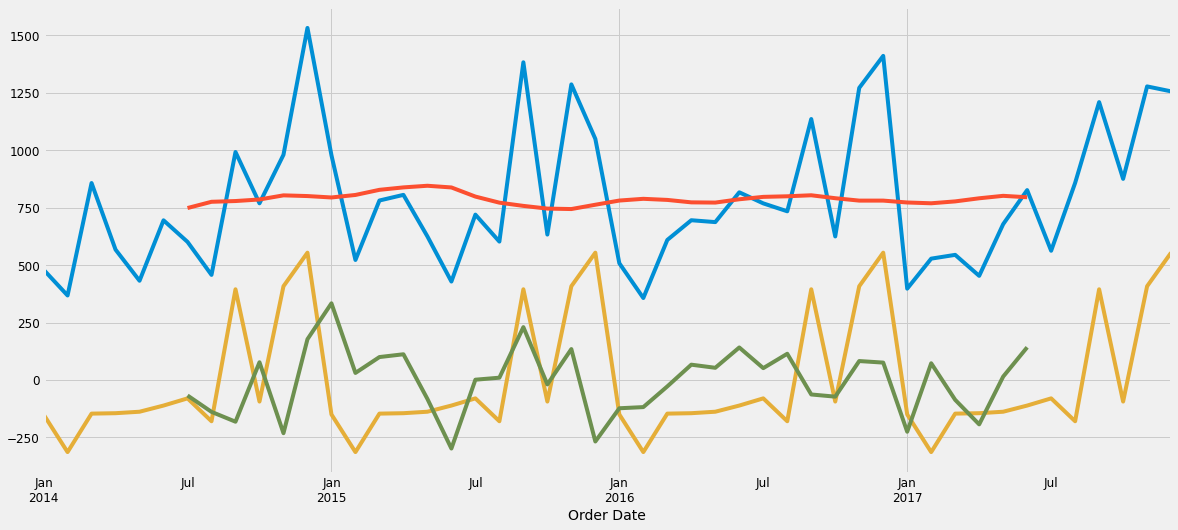

In [18]:
#um... hmmmmm, ok. Maybe I just need to write them all out?
#at least until I figure out why it's not doing so correctly
decomposition.observed.plot() #blue
decomposition.trend.plot() #red
decomposition.seasonal.plot() #yellow
decomposition.resid.plot() #green
plt.show()

#doing that puts them all on the same graph, which is not desired
#fix later ig

In [19]:
#common method for time-series forecasting 
#(ARIMA = Autoregressive Integrated Moving Average)
#so parameter selection for the TSM

p = d = q = range(0,2)
#accounting for seasonality, trend and noise; p = 0, d = 1, q = 2
#p - does x(t-p) have influence on x(t), does july data have an influence on some other month's data
#d - how mnay times should you apply the differencing operator to make it stationary (amount of integration of processes)
#q - how many prior noises (errors) affect the current value
pdq = list(itertools.product(p,d,q))
#list holding cartesian product (equivalent to a nested for-loop)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

#no problem running this so lets start explaining

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
#@ignore_warnings(category=ConvergenceWarning)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, 
                                            order=param, 
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False, 
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'. format(param, 
                                                  param_seasonal, 
                                                  results.aic))
        except:
            continue
        
#lowest AIC value is at (1,1,1)x(1,1,0,12) so that's optimal

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1440.9704626862147
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793829
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:879.6739257675616
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280302928
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758093
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2677.095385414126


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809134
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.62613896732944


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.6188603265909
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2507.169572353393
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468646
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576431141
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1646.3667445000483
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567198382


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.9671228167957
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1202.4828080017417
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.91132001514774
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817488


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2291.563946193645
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87055484828255
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233392755
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442807


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2438.280290873474
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417307
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.55766214612447
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1108.4035864478428
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.2077675160949
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935194


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1153.969818164378
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084607
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.58426921438513
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442186298
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2627.3902520399797


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36851958150703
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.3422193965919
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238770615


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2301.3798221364527
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002121885
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.7513188858028
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1349.6713670861686
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.21306116190937
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784957
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:739482282675085.1
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.62709013454116
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.32649925188457
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835006


c:\users\monae\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1479.491970924471
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687609896
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.38730069394234
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546607534
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2363.642590033546
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439540368
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.36610144142674


In [28]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1,1,1),
                                seasonal_order = (1,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

#Leave as is:
# error for graphs below: ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.
# means I don't get graphs in the cell below
#Comment out enforce_stationarity:
# saying do not transform the autoregressive components
# I can have graphs in the cell below
# but it changes my MSE and RMSE 
#no need to change invertibility thought

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


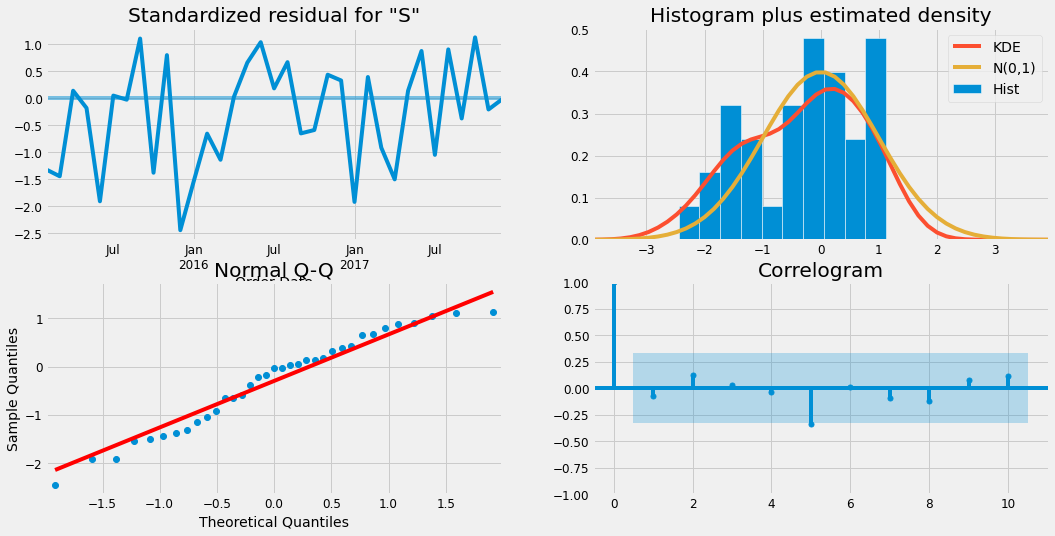

In [24]:
#model diagnostics to investigate if it's being a bit weird
#not perfect but at least normally distributed
results.plot_diagnostics(figsize=(16, 8))
plt.show()

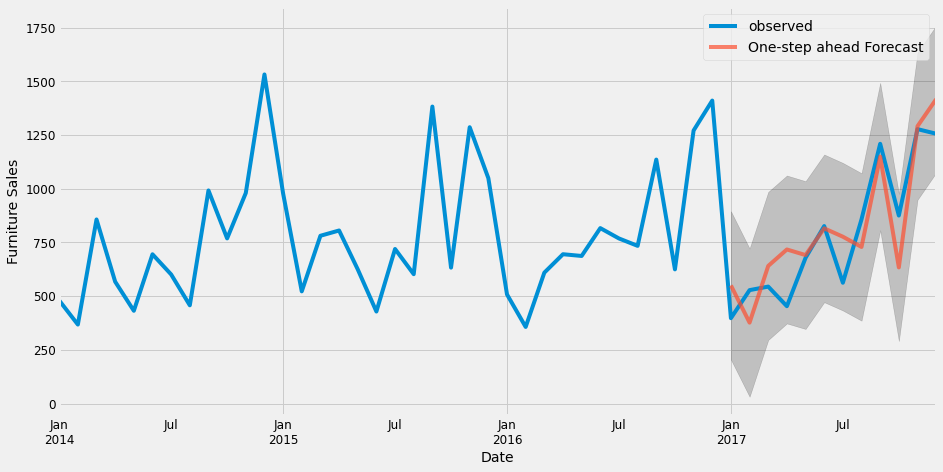

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,
                         label='One-step ahead Forecast',
                         alpha=.7,
                         figsize=(14,7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color = 'k',
                alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

#this graph works?? so not sure what's up with the previous ones

In [30]:
y_forecasted = pred.predicted_mean
y_truth = y['2-17-01-01':]

mse = ((y_forecasted - y_truth)**2).mean()
print('The Mean Squared Error of out forecasts is {}'.format(round(mse,2)))

The Mean Squared Error of out forecasts is 22993.57


In [31]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


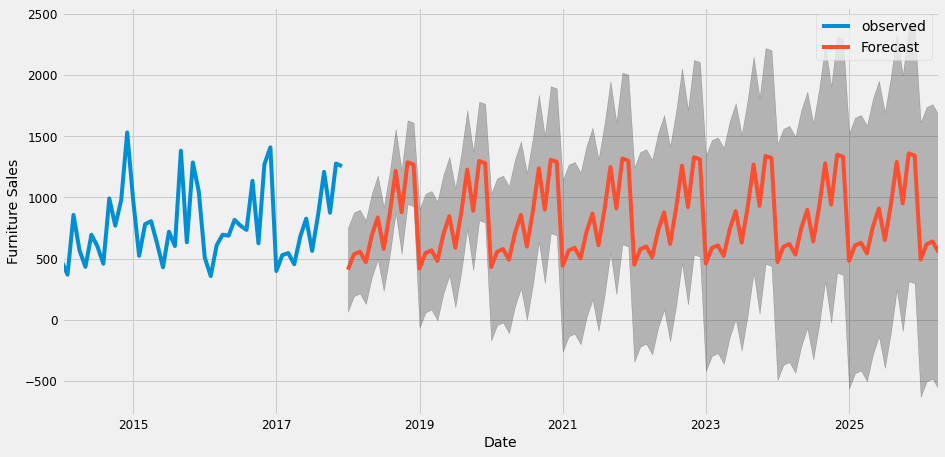

In [32]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label = 'Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color = 'k',
                alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [33]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [34]:
#same as last time so going to do it all in one but will still comment accordingly
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


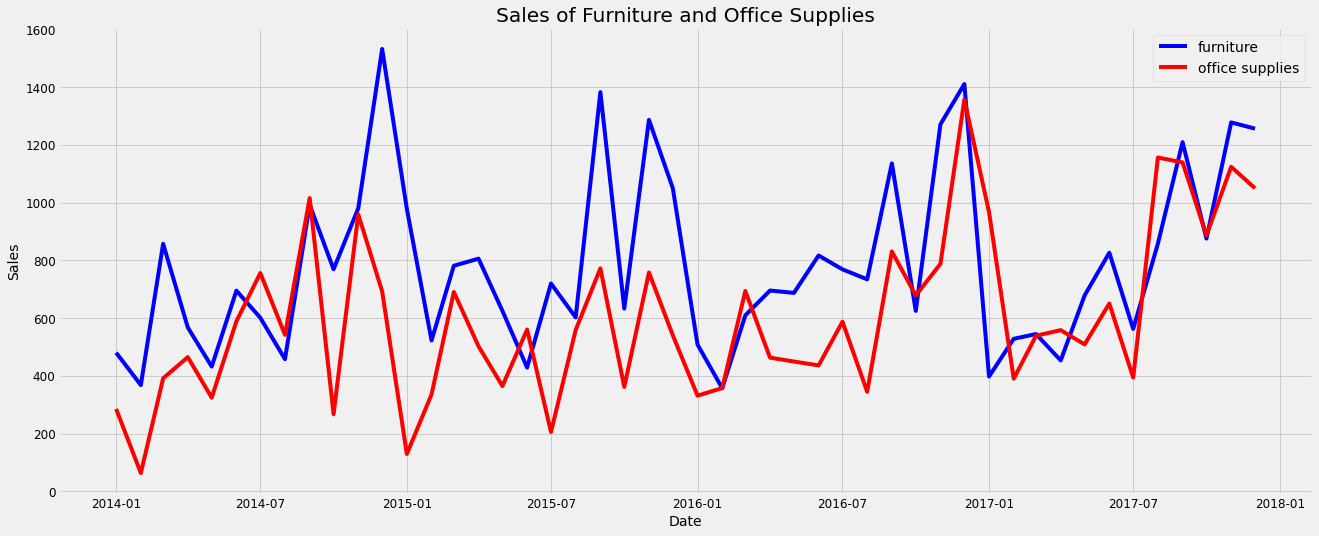

In [35]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

In [36]:
#first_date = store.ix[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
#gives an error: 'DataFrame' object has no attribute 'ix'
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
#note, .ix is deprecated, also .iloc (recommended replacement) gives the following:
#"Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types"
# because .loc is for str or boolean indexing, which this actually is
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))
#


Office supplies first time produced higher sales than furniture is 2014-07-01.


22:19:10 - cmdstanpy - INFO - Chain [1] start processing
22:19:11 - cmdstanpy - INFO - Chain [1] done processing
22:19:11 - cmdstanpy - INFO - Chain [1] start processing
22:19:11 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1296x432 with 0 Axes>

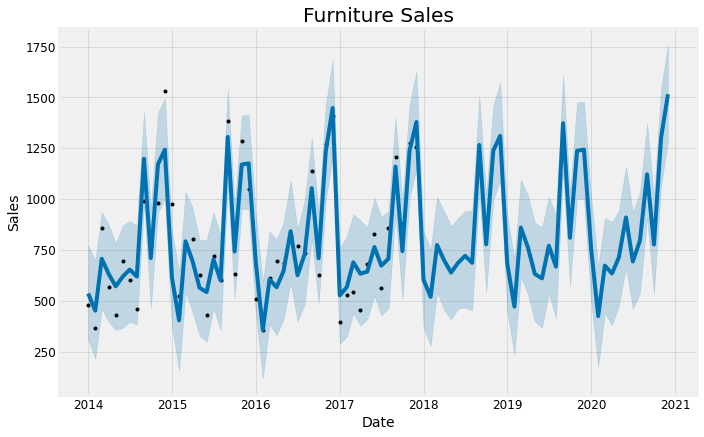

In [38]:
from prophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

<Figure size 1296x432 with 0 Axes>

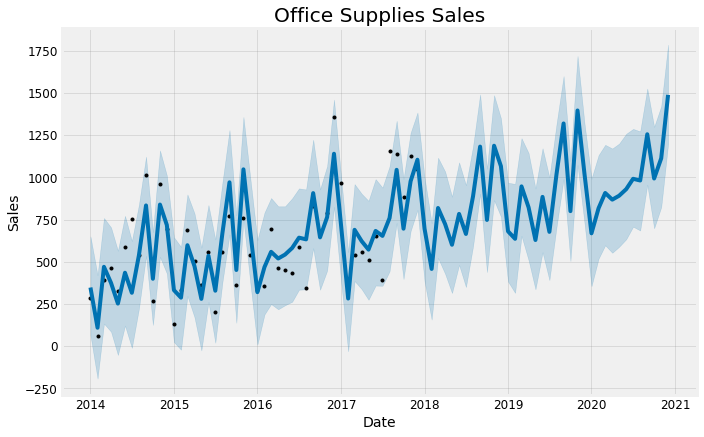

In [39]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

In [40]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.058109,307.001251,772.101519,726.058109,726.058109,-190.686099,-190.686099,-190.686099,-190.686099,...,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,0.0,0.0,0.0,347.489370
1,2014-02-01,727.494421,216.381205,699.975953,727.494421,727.494421,-276.379157,-276.379157,-276.379157,-276.379157,...,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,0.0,0.0,0.0,109.240405
2,2014-03-01,728.791734,459.665081,935.838557,728.791734,728.791734,-22.388253,-22.388253,-22.388253,-22.388253,...,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,0.0,0.0,0.0,470.212385
3,2014-04-01,730.228046,395.960122,872.289950,730.228046,730.228046,-100.140909,-100.140909,-100.140909,-100.140909,...,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,0.0,0.0,0.0,374.687928
4,2014-05-01,731.618025,355.296115,782.394534,731.618025,731.618025,-160.818882,-160.818882,-160.818882,-160.818882,...,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,0.0,0.0,0.0,252.304409


No handles with labels found to put in legend.


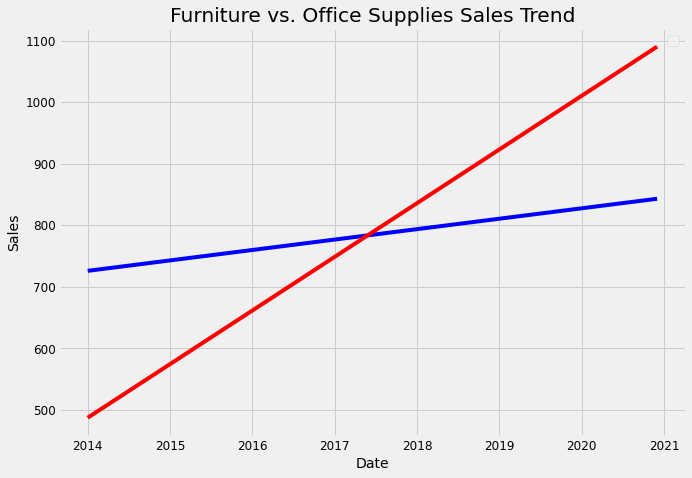

In [41]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

No handles with labels found to put in legend.


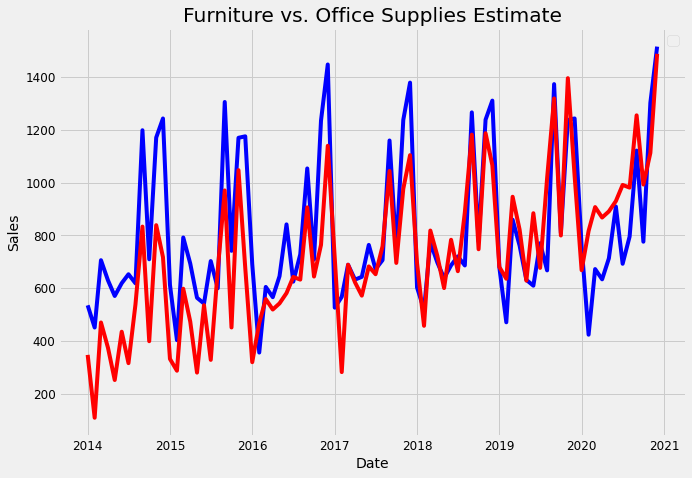

In [42]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

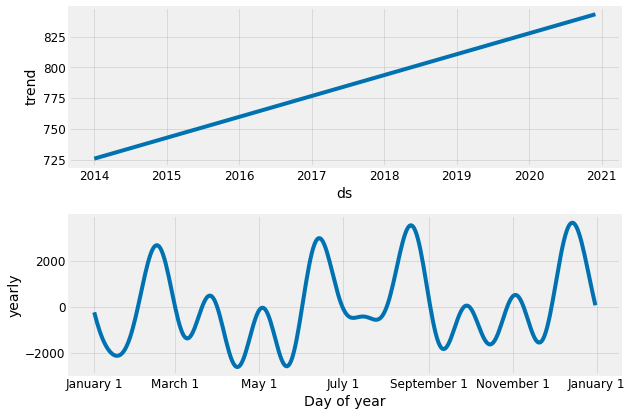

In [43]:
furniture_model.plot_components(furniture_forecast);

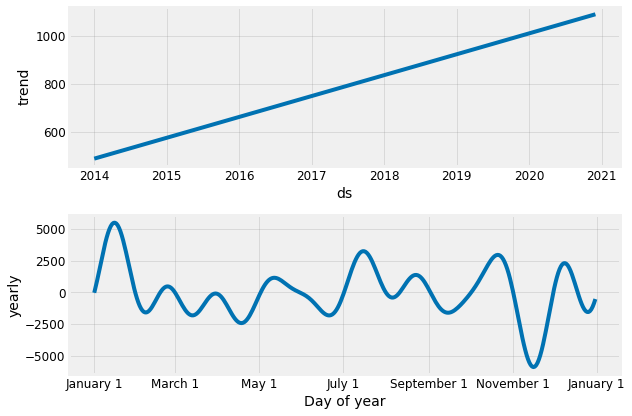

In [44]:
office_model.plot_components(office_forecast);